# This notebook implements linear regression for a machine learning exercise.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Warm-Up Exercise
# A simple function to return a 5x5 identity matrix.

In [2]:
def warmUpExercise():
    #TODO: implement this part of code
    return np.identity(5) # Retorna uma matriz identidade 5x5

# Test warmUpExercise
print("Running warmUpExercise...")
print("5x5 Identity Matrix:")
print(warmUpExercise())

Running warmUpExercise...
5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Loading and plotting data
# Load and visualize data from ex1data1.txt

In [3]:
# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]  # Population size in 10,000s
y = data[:, 1]  # Profit in $10,000s
m = len(y)  # Number of training examples

# Plotting data
# Function to plot the data points.

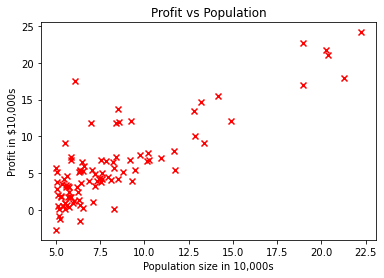

In [4]:
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel('Population size in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profit vs Population')
    plt.show()

# Plot data
plotData(X, y)

# Cost function and gradient descent
# Implementing cost function and gradient descent.

In [5]:
# Compute cost
def computeCost(X, y, theta):
    #TODO: implement this part of code
    
    """
    Computes the cost for linear regression.
    X: The input features (design matrix, augmented with a column of ones). Shape (m, n+1).
    y: The target values. Shape (m,) or (m, 1).
    theta: The parameters of the linear regression model. Shape (n+1,) or (n+1, 1).
    """
    m = len(y)  # Number of training examples
    
    # Calculate the hypothesis (predictions)
    # If X is (m, 2) and theta is (2,), predictions will be (m,)
    predictions = X @ theta
    
    # Calculate the squared errors
    # (predictions - y) will be (m,) - (m,) resulting in (m,)
    # (predictions - y)**2 will also be (m,)
    sq_errors = (predictions - y)**2
    
    # Calculate the cost J
    # np.sum(sq_errors) will sum all elements, resulting in a scalar
    J = (1 / (2 * m)) * np.sum(sq_errors)
    
    # J should be a single scalar value
    return J

# Gradient descent
def gradientDescent(X, y, theta, alpha, iterations):
    
    #TODO: implement this part of code
    """
    Performs gradient descent to learn theta.
    X: The input features (design matrix, usually augmented with a column of ones).
    y: The target values.
    theta: Initial parameters.
    alpha: The learning rate.
    iterations: The number of iterations to run gradient descent.
    """
    m = len(y) # Number of training examples
    J_history = np.zeros(iterations) # To store cost for each iteration

    for iter in range(iterations):
        # Calculate the hypothesis (predictions)
        predictions = X @ theta
        
        # Calculate the error term (predictions - y)
        errors = predictions - y
        
        # Calculate the gradient for each theta parameter and update theta simultaneously
        # The update rule is: theta_j := theta_j - alpha * (1/m) * sum((h(x_i) - y_i) * x_ij)
        # Vectorized: theta = theta - (alpha / m) * X.T @ errors
        
        theta = theta - (alpha / m) * (X.T @ errors)
        
        # Save the cost J at each iteration
        J_history[iter] = computeCost(X, y, theta)
        
    return theta, J_history


# Prepare data for linear regression

In [6]:
X_with_intercept = np.column_stack((np.ones(m), X))
theta = np.zeros(2)  # Initialize fitting parameters
iterations = 1500
alpha = 0.01

In [7]:
# Test cost function
print("\nTesting the cost function...")
J = computeCost(X_with_intercept, y, theta)
print(f"With theta = [0 ; 0]\nCost computed = {J}")
print("Expected cost value (approx) 32.07")


Testing the cost function...
With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [8]:
J = computeCost(X_with_intercept, y, np.array([-1, 2]))
print(f"With theta = [-1 ; 2]\nCost computed = {J}")
print("Expected cost value (approx) 54.24")

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [9]:
# Run gradient descent
#theta = gradientDescent(X_with_intercept, y, theta, alpha, iterations)
theta_final, J_history = gradientDescent(X_with_intercept, y, theta, alpha, iterations)
print("Theta found by gradient descent:")
print(theta_final)
print("Expected theta values (approx): [-3.6303, 1.1664]")

Theta found by gradient descent:
[-3.63029144  1.16636235]
Expected theta values (approx): [-3.6303, 1.1664]


# Plot linear fit

[0. 0.]


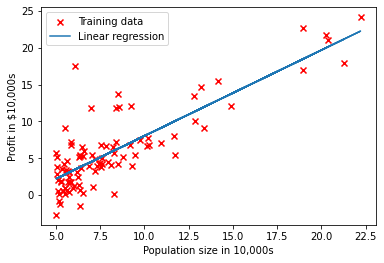

In [10]:
print(theta)

plt.scatter(X, y, marker='x', c='r', label='Training data')
plt.plot(X, X_with_intercept @ theta_final, '-', label='Linear regression')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

# Predict values

In [11]:
predict1 = np.array([1, 3.5]) @ theta_final
predict2 = np.array([1, 7]) @ theta_final
print(f"For population = 35,000, we predict a profit of {predict1 * 10000}")
print(f"For population = 70,000, we predict a profit of {predict2 * 10000}")

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


# Visualizing $J(\theta_0, \theta_1)$
# Visualize the cost function to see how it changes with different values of theta.

In [12]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [13]:
# Compute cost for each combination of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X_with_intercept, y, t)

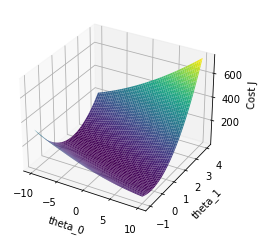

In [14]:
# Surface plot
J_vals = J_vals.T  # Transpose for correct orientation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.show()

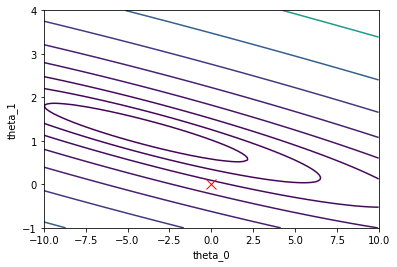

In [15]:
# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.show()


# Initialization
# Linear regression with multiple variables for predicting house prices.

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
# Load data from ex1data2.txt

In [17]:
# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]  # Features: size and number of bedrooms
y = data[:, 2]   # Target: price
m = len(y)       # Number of training examples

# Display first 10 examples of the dataset
print("First 10 examples from the dataset:")
for i in range(10):
    print(f"x = [{X[i, 0]:.0f}, {X[i, 1]:.0f}], y = {y[i]:.0f}")

First 10 examples from the dataset:
x = [2104, 3], y = 399900
x = [1600, 3], y = 329900
x = [2400, 3], y = 369000
x = [1416, 2], y = 232000
x = [3000, 4], y = 539900
x = [1985, 4], y = 299900
x = [1534, 3], y = 314900
x = [1427, 3], y = 198999
x = [1380, 3], y = 212000
x = [1494, 3], y = 242500


In [18]:
# Normalize features
def featureNormalize(X):
    #TODO: implement this part of code
    
    """
    Normalizes the features in X. Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation is 1.
    """
    
    # Convert X to a NumPy array if it's not already (good practice)
    X = np.array(X, dtype=float) # Ensure float type for calculations

    # Calculate the mean of each feature (column)
    # axis=0 means compute the mean for each column
    mu = np.mean(X, axis=0)

    # Calculate the standard deviation of each feature (column)
    # axis=0 means compute the standard deviation for each column
    # ddof=0 for population standard deviation (default in numpy for std)
    # ddof=1 for sample standard deviation
    # In machine learning, typically population std is used for feature scaling.
    sigma = np.std(X, axis=0)

    # Apply the normalization formula: (x - mu) / sigma
    # NumPy handles broadcasting automatically here, subtracting mu and dividing by sigma for each column
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

print("Normalizing Features...")
X, mu, sigma = featureNormalize(X)

Normalizing Features...


In [19]:
# Add intercept term to X
X = np.column_stack((np.ones(m), X))

# Gradient Descent
# Implementing gradient descent for multiple variables.

In [20]:
# Compute cost
def computeCostMulti(X, y, theta):
    
    #TODO: implement this part of code
    
    """
    Computes the cost for linear regression with multiple variables.
    X: The input features (design matrix, augmented with a column of ones). Shape (m, n+1).
    y: The target values. Shape (m,) or (m, 1).
    theta: The parameters of the linear regression model. Shape (n+1,) or (n+1, 1).
    """
    
    m = len(y)  # Number of training examples

    # Calculate the hypothesis (predictions)
    # X @ theta performs the dot product (matrix multiplication)
    predictions = X @ theta

    # Calculate the squared errors
    sq_errors = (predictions - y)**2

    # Calculate the cost J
    J = (1 / (2 * m)) * np.sum(sq_errors)

    return J 

In [21]:
# Gradient descent
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    #TODO: implement this part of code
    
    """
    Performs gradient descent to learn theta for multiple variables.
    X: The input features (design matrix, augmented with a column of ones). Shape (m, n+1).
    y: The target values. Shape (m,) or (m, 1).
    theta: Initial parameters. Shape (n+1,) or (n+1, 1).
    alpha: The learning rate.
    num_iters: The number of iterations to run gradient descent.
    """
    
    m = len(y) # Number of training examples
    J_history = np.zeros(num_iters) # To store cost for each iteration

    for iter in range(num_iters):
        # Calculate the hypothesis (predictions)
        predictions = X @ theta

        # Calculate the error term (predictions - y)
        errors = predictions - y

        # Update theta parameters simultaneously
        # X.T @ errors will correctly compute the gradient for each theta_j
        theta = theta - (alpha / m) * (X.T @ errors)

        # Save the cost J at each iteration
        J_history[iter] = computeCostMulti(X, y, theta)

    return theta, J_history

In [22]:
# Running gradient descent
alpha = 0.01
num_iters = 800

theta = np.zeros(X.shape[1])  # Initialize fitting parameters
print("Running gradient descent...")

theta_final, J_history_multi = gradientDescentMulti(X, y, theta, alpha, num_iters)


Running gradient descent...


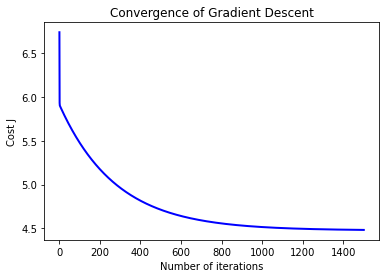

Theta computed from gradient descent:
[0. 0. 0.]


In [23]:
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

In [24]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms
normalized_features = (np.array([1650, 3]) - mu) / sigma
normalized_features = np.insert(normalized_features, 0, 1)  # Add intercept term
price = normalized_features @ theta_final

print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")
print(f'Expected price (approx): 289314.62')


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 293346.56
Expected price (approx): 289314.62


## Optional: Selecting learning rates

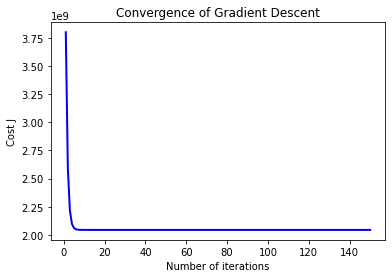

Theta computed from gradient descent:
[340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 293346.56


In [25]:
# Running gradient descent
alpha = 1.
num_iters = 150

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)
print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")

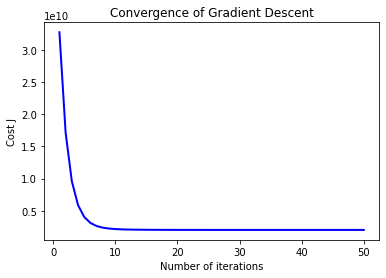

Theta computed from gradient descent:
[340412.65345227 109398.90129361  -6529.45967813]


In [26]:
# Running gradient descent
alpha = 0.3
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

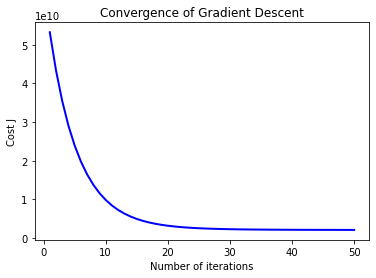

Theta computed from gradient descent:
[338658.2492493  103322.82942954   -474.74249522]


In [27]:
# Running gradient descent
alpha = 0.1
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

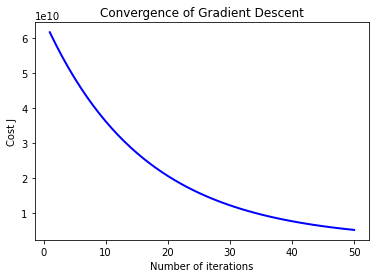

Theta computed from gradient descent:
[266180.44519135  74914.10261664  18590.28082278]


In [28]:
# Running gradient descent
alpha = 0.03
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

# Normal Equations
# Solving the linear regression problem using normal equations.

In [29]:
# Normal equations
def normalEqn(X, y):
    #TODO: implement this part of code
    """
    Computes the parameters theta using the normal equations.
    X: The input features (design matrix, augmented with a column of ones).
    y: The target values.
    """
    # Calculate X_transpose * X
    # (X.T @ X) is equivalent to np.dot(X.T, X)
    XTX = X.T @ X
    
    # Calculate the inverse of (X_transpose * X)
    # np.linalg.inv() computes the inverse of a matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # Calculate X_transpose * y
    XTy = X.T @ y
    
    # Calculate theta = (X_transpose * X)^-1 * X_transpose * y
    theta = XTX_inv @ XTy
    
    return theta

print("Solving with normal equations...")
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Add intercept term to X
X = np.column_stack((np.ones(len(y)), X))
m = len(y)
X_normal_eqn_with_intercept = np.column_stack((np.ones(m), X))

theta = normalEqn(X, y)

print("Theta computed from the normal equations:")
print(theta)

Solving with normal equations...
Theta computed from the normal equations:
[89597.9095428    139.21067402 -8738.01911233]


In [30]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms using normal equations
price = np.array([1, 1650, 3]) @ theta
print(f"Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $ {price:.2f}")
print(f'Expected price (approx): 293081.46')

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $ 293081.46
Expected price (approx): 293081.46
